In [21]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
# File to Load (Remember to Change These)
school_data = "INSchoolDataCopy.csv"
test_score_data = "SchoolCorpDataRefined.csv"
income_data = "IncomeUpdateRefined.csv"
zip_city_codes = 'ZipCityCodes.csv'
zip_updated = 'zip_city_updated.csv'
sample_money = 'sampleMoney.csv'
# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data)
test_score_data = pd.read_csv(test_score_data)
income_data = pd.read_csv(income_data)
zip_city_codes = pd.read_csv(zip_city_codes)
zip_updated = pd.read_csv(zip_updated)
sample_money = pd.read_csv(sample_money)
# Combine the data into a single dataset


In [22]:
def set_pandas_display_options() -> None:
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 2000
    display.max_rows = 2000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [23]:
sample_money.dtypes



ZIP                              float64
Size of adjusted gross income     object
number of returns                 object
single returns                    object
joint returns                     object
Adjusted gross income             object
dtype: object

In [24]:
sample_money['Adjusted gross income'] = pd.to_numeric(sample_money['Adjusted gross income'], errors='coerce')

In [25]:
sample_money['single returns'] = pd.to_numeric(sample_money['single returns'], errors='coerce')

In [26]:
sample_money['joint returns'] = pd.to_numeric(sample_money['joint returns'], errors='coerce')

In [27]:
sample_money['number of returns'] = pd.to_numeric(sample_money['number of returns'], errors='coerce')

In [28]:
sample_money['ZIP'] = pd.to_numeric(sample_money['ZIP'], errors='coerce')

In [29]:
school_complete = pd.merge(school_data, test_score_data, how="left", on=["ID", "ID"])

In [30]:
school_complete


,ID,District Name,Mailing Address,City,State,ZIP,Overall Points,Overall Grade
0,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN
1,15.0,ADAMS CENTRAL COMMUNITY SCHOOLS,222 W WASHINGTON ST,MONROE,IN,46772,87.2,B
2,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,46001,73.2,C
3,5275.0,ANDERSON COMMUNITY SCHOOL CORP,1600 HILLCREST AVE,ANDERSON,IN,46011,72.4,C
4,9790.0,ANDERSON PREPARATORY ACADEMY,3205 W 25TH ST,ANDERSON,IN,46011,NaN,NaN
5,9715.0,ANDREW ACADEMY,4050 E 38TH ST,INDIANAPOLIS,IN,46218,NaN,NaN
6,9615.0,ANDREW J BROWN ACADEMY,3600 N GERMAN CHURCH RD,INDIANAPOLIS,IN,46235,NaN,NaN
7,6700.0,AREA 30 CAREER CENTER EDU INTER,1 N CALBERT WAY SUITE A,GREENCASTLE,IN,46135,NaN,NaN
8,5470.0,ARGOS COMMUNITY SCHOOLS,410 N FIRST ST,ARGOS,IN,46501,80.4,B
9,9685.0,ASPIRE CHARTER ACADEMY,4900 W 15TH AVE,GARY,IN,46406,NaN,NaN


In [31]:
zip_sample = pd.pivot_table(sample_money, values=[ 'Adjusted gross income'],  index=['ZIP'],
                      aggfunc={ 'Adjusted gross income': np.median})
                                
                               
zip_sample  

,Adjusted gross income
ZIP,
0.0,27616132.5
46001.0,43256.0
46011.0,72958.5
46012.0,72021.5
46013.0,62791.5
46016.0,30988.0
46017.0,25946.0
46030.0,13281.5
46031.0,9516.0


In [32]:
school_complete = pd.merge(sample_money, school_complete, how="left", on=["ZIP", "ZIP"])



In [33]:
school_complete['Overall Points'] = pd.to_numeric(school_complete['Overall Points'], errors='coerce')

In [34]:
school_complete.dropna()

,ZIP,Size of adjusted gross income,number of returns,single returns,joint returns,Adjusted gross income,ID,District Name,Mailing Address,City,State,Overall Points,Overall Grade
11,46001.0,"$1 under $25,000",1910.0,1260.0,340.0,23258.0,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,73.2,C
12,46001.0,"$25,000 under $50,000",1280.0,560.0,460.0,46583.0,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,73.2,C
13,46001.0,"$50,000 under $75,000",760.0,220.0,440.0,46723.0,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,73.2,C
14,46001.0,"$75,000 under $100,000",460.0,70.0,370.0,39929.0,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,73.2,C
15,46001.0,"$100,000 under $200,000",460.0,20.0,430.0,57726.0,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,73.2,C
21,46011.0,"$1 under $25,000",2960.0,2040.0,410.0,36836.0,5275.0,ANDERSON COMMUNITY SCHOOL CORP,1600 HILLCREST AVE,ANDERSON,IN,72.4,C
23,46011.0,"$1 under $25,000",2960.0,2040.0,410.0,36836.0,5245.0,FRANKTON-LAPEL COMMUNITY SCHS,7916 W 300 N,ANDERSON,IN,82.7,B
24,46011.0,"$25,000 under $50,000",2070.0,1000.0,600.0,75263.0,5275.0,ANDERSON COMMUNITY SCHOOL CORP,1600 HILLCREST AVE,ANDERSON,IN,72.4,C
26,46011.0,"$25,000 under $50,000",2070.0,1000.0,600.0,75263.0,5245.0,FRANKTON-LAPEL COMMUNITY SCHS,7916 W 300 N,ANDERSON,IN,82.7,B
27,46011.0,"$50,000 under $75,000",1220.0,400.0,660.0,74992.0,5275.0,ANDERSON COMMUNITY SCHOOL CORP,1600 HILLCREST AVE,ANDERSON,IN,72.4,C


In [35]:
school_comparison = pd.pivot_table(school_complete, values=[ 'Adjusted gross income'],
                                                         index=['City', 'Overall Points', 'Overall Grade', 'District Name', 'ID'],
                      aggfunc={ 'Adjusted gross income': [np.median, np.sum]})
                               
                                
school_comparison

Adjusted gross income  \
                                                                                                      median   
City            Overall Points Overall Grade District Name                      ID                             
AKRON           83.6           B             TIPPECANOE VALLEY SCHOOL CORP      4445.0               15218.0   
ALBION          76.3           C             CENTRAL NOBLE COM SCHOOL CORP      6055.0               34355.5   
ALEXANDRIA      73.2           C             ALEXANDRIA COM SCHOOL CORP         5265.0               43256.0   
ANDERSON        72.4           C             ANDERSON COMMUNITY SCHOOL CORP     5275.0               72958.5   
                82.7           B             FRANKTON-LAPEL COMMUNITY SCHS      5245.0               72958.5   
ANGOLA          84.7           B             M S D STEUBEN COUNTY               7615.0               75642.0   
ARCADIA         86.0           B             HAMILTON HEIGHTS SCHOOL CORP       3025.0               13281.5   
ARGOS           80.4           B             ARGOS COMMUNITY SCHOOLS            5470.0               16112.0   
ATTICA          79.4           C             ATTICA CONSOLIDATED SCH CORP       2435.0               25679.0   
AURORA          79.1           C             SOUTH DEARBORN COM SCHOOL CORP     1600.0               44711.5   
AUSTIN          77.4           C             SCOTT COUNTY SCHOOL DISTRICT 1     7230.0               24722.0   
AVON            88.4           B             AVON COMMUNITY SCHOOL CORP         3315.0              175664.5   
BAINBRIDGE      88.9           B             NORTH PUTNAM COMMUNITY SCHOOLS     6715.0                8487.0   
BATESVILLE      90.8           A             BATESVILLE COMMUNITY SCH CORP      6895.0               53816.5   
BEDFORD         80.0           B             NORTH LAWRENCE COM SCHOOLS         5075.0              111716.5   
BEECH GROVE     72.4           C             BEECH GROVE CITY SCHOOLS           5380.0               44959.0   
BERNE           90.3           A             SOUTH ADAMS SCHOOLS                35.0                 29869.5   
BICKNELL        80.6           B             NORTH KNOX SCHOOL CORP             4315.0               13560.0   
BLOOMFIELD      87.2           B             BLOOMFIELD SCHOOL DISTRICT         2920.0               37922.0   
                87.7           B             EASTERN GREENE SCHOOLS             2940.0               37922.0   
BLOOMINGTON     90.6           A             MONROE COUNTY COM SCH CORP         5740.0              131027.0   
BLUFFTON        89.5           B             M S D BLUFFTON-HARRISON            8445.0               63744.0   
BOURBON         96.4           A             TRITON SCHOOL CORPORATION          5495.0               16352.5   
BRAZIL          87.1           B             CLAY COMMUNITY SCHOOLS             1125.0               76513.5   
BREMEN          87.3           B             BREMEN PUBLIC SCHOOLS              5480.0               50282.5   
BROOKVILLE      83.6           B             FRANKLIN COUNTY COM SCH CORP       2475.0               45284.0   
BROWNSBURG      99.0           A             BROWNSBURG COMMUNITY SCH CORP      3305.0              178028.5   
BROWNSTOWN      83.8           B             BROWNSTOWN CNT COM SCH CORP        3695.0               22442.0   
BUNKER HILL     80.9           B             MACONAQUAH SCHOOL CORP             5615.0                7663.0   
BUTLER          90.4           A             DEKALB CO EASTERN COM SCH DIST     1805.0               21663.0   
CAMPBELLSBURG   79.7           C             WEST WASHINGTON SCHOOL CORP        8220.0                7923.0   
CANNELTON       59.3           F             CANNELTON CITY SCHOOLS             6340.0               11725.0   
CARMEL          98.3           A             CARMEL CLAY SCHOOLS                3060.0              120463.0   
CAYUGA          77.5           C             NORTH VERM

In [58]:
indy_school = school_comparison.loc['INDIANAPOLIS']

In [60]:
indy_school

Adjusted gross income  \
                                                                                  median   
Overall Points Overall Grade District Name                  ID                             
64.7           D             INDIANAPOLIS PUBLIC SCHOOLS    5385.0               44107.5   
69.0           D             M S D WARREN TOWNSHIP          5360.0              122324.0   
73.8           C             M S D DECATUR TOWNSHIP         5300.0               87183.0   
75.9           C             M S D WAYNE TOWNSHIP           5375.0               71340.0   
77.4           C             M S D WASHINGTON TOWNSHIP      5370.0              107969.0   
78.2           C             M S D LAWRENCE TOWNSHIP        5330.0              124886.5   
79.9           C             M S D PIKE TOWNSHIP            5350.0              108731.0   
87.1           B             M S D PERRY TOWNSHIP           5340.0              185908.0   
88.5           B             FRANKLIN TOWNSHIP COM SCH CORP 5310.0               56135.0   

                                                                               
                                                                          sum  
Overall Points Overall Grade District Name                  ID                 
64.7           D             INDIANAPOLIS PUBLIC SCHOOLS    5385.0   551529.0  
69.0           D             M S D WARREN TOWNSHIP          5360.0   725124.0  
73.8           C             M S D DECATUR TOWNSHIP         5300.0   505729.0  
75.9           C             M S D WAYNE TOWNSHIP           5375.0   461837.0  
77.4           C             M S D WASHINGTON TOWNSHIP      5370.0  1211480.0  
78.2           C             M S D LAWRENCE TOWNSHIP        5330.0  1292060.0  
79.9           C             M S D PIKE TOWNSHIP            5350.0   638936.0  
87.1           B             M S D PERRY TOWNSHIP           5340.0  1119609.0  
88.5           B             FRANKLIN TOWNSHIP COM SCH CORP 5310.0   550937.0

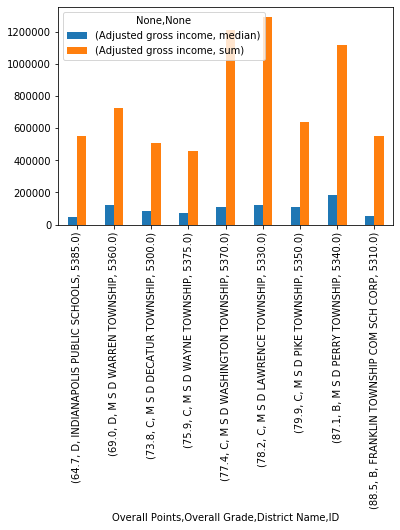

In [62]:
indy_school.plot.bar()